In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print "dimension de las imagenes y las clases", X.shape, y.shape

dimension de las imagenes y las clases (1500, 784) (1500,)


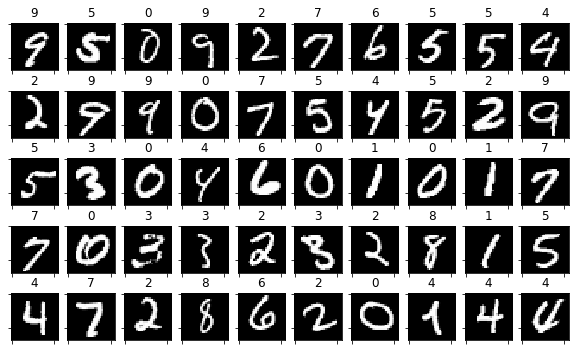

In [3]:
perm = np.random.permutation(range(X.shape[0]))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# A regular neural network for classification

![alt text](./Images/ann1.png)

Number of connections:

    INPUT to LAYER 1:    784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:   50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:   30*20 + 20 (bias) = 620
    LAYER 3 to OUTPUT:    20*10 + 10 (bias) = 210
    
                                         TOTAL 41610

observe we convert `y` to a one_hot encoding

In [4]:
yoh = np.eye(10)[y]

In [5]:
i = np.random.randint(len(y))
y[i], yoh[i]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print X_train.shape, y_train_oh.shape

(300, 784) (300, 10)


### create the model

In [7]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [8]:
def get_model_A(input_dim, s1, s2, s3, s3_activation="relu"):
    print input_dim*s1 + s1*s2 + s2*s3 + s3*10 + s1+s2+s3+10
    clear_session()
    model = Sequential()
    model.add(Dense(s1, activation='relu', input_dim=input_dim))
    model.add(Dense(s2, activation='relu'))
    model.add(Dense(s3, activation=s3_activation))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

In [9]:
model = get_model_A(input_dim=X.shape[1], s1=50, s2=30, s3=20)
model.summary()

41610
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 41,610
Trainable params: 41,610
Non-trainable params: 0
_________________________________________________________________


### fit and display losses

In [10]:
model.fit(X_train, y_train_oh, epochs=200, batch_size=32, validation_data=(X_test, y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/200
300/300 [==============================] - 2s 5ms/step - loss: 2.2683 - val_loss: 2.2380
Epoch 2/200
300/300 [==============================] - 0s 671us/step - loss: 2.1658 - val_loss: 2.1592
Epoch 3/200
300/300 [==============================] - 0s 1ms/step - loss: 2.0495 - val_loss: 2.0535
Epoch 4/200
300/300 [==============================] - 0s 667us/step - loss: 1.9218 - val_loss: 1.9208
Epoch 5/200
300/300 [==============================] - 0s 648us/step - loss: 1.7587 - val_loss: 1.7545
Epoch 6/200
300/300 [==============================] - 0s 615us/step - loss: 1.5298 - val_loss: 1.4877
Epoch 7/200
300/300 [==============================] - 0s 611us/step - loss: 1.2106 - val_loss: 1.2252
Epoch 8/200
300/300 [==============================] - 0s 705us/step - loss: 0.8648 - val_loss: 0.9434
Epoch 9/200
300/300 [==============================] - 0s 801us/step - loss: 0.6208 - val_loss: 0.8353
Epoch 10/200
300/300 [========

Epoch 80/200
300/300 [==============================] - 0s 472us/step - loss: 0.0022 - val_loss: 0.8751
Epoch 81/200
300/300 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.8762
Epoch 82/200
300/300 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.8816
Epoch 83/200
300/300 [==============================] - 0s 530us/step - loss: 0.0020 - val_loss: 0.8771
Epoch 84/200
300/300 [==============================] - 0s 513us/step - loss: 0.0020 - val_loss: 0.8828
Epoch 85/200
300/300 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.8855
Epoch 86/200
300/300 [==============================] - 0s 489us/step - loss: 0.0019 - val_loss: 0.8851
Epoch 87/200
300/300 [==============================] - 0s 529us/step - loss: 0.0018 - val_loss: 0.8887
Epoch 88/200
300/300 [==============================] - 0s 893us/step - loss: 0.0018 - val_loss: 0.8898
Epoch 89/200
300/300 [==============================] - 1s 2ms/step - 

Epoch 157/200
300/300 [==============================] - 0s 539us/step - loss: 4.9759e-04 - val_loss: 0.9930
Epoch 158/200
300/300 [==============================] - 0s 541us/step - loss: 4.9057e-04 - val_loss: 0.9940
Epoch 159/200
300/300 [==============================] - 0s 1ms/step - loss: 4.8367e-04 - val_loss: 0.9942
Epoch 160/200
300/300 [==============================] - 0s 502us/step - loss: 4.7652e-04 - val_loss: 0.9948
Epoch 161/200
300/300 [==============================] - 0s 440us/step - loss: 4.6985e-04 - val_loss: 0.9963
Epoch 162/200
300/300 [==============================] - 0s 688us/step - loss: 4.6443e-04 - val_loss: 1.0003
Epoch 163/200
300/300 [==============================] - 0s 962us/step - loss: 4.5704e-04 - val_loss: 0.9998
Epoch 164/200
300/300 [==============================] - 0s 526us/step - loss: 4.5067e-04 - val_loss: 1.0026
Epoch 165/200
300/300 [==============================] - 0s 578us/step - loss: 4.4399e-04 - val_loss: 1.0043
Epoch 166/200
300/300

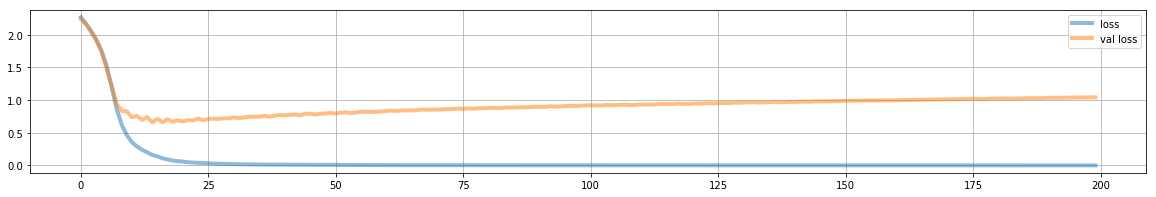

In [11]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

### measure accuracies

- why are we using argmax below?

In [12]:
preds_train = model.predict(X_train).argmax(axis=1)
preds_test = model.predict(X_test).argmax(axis=1)

print "accuracy train %.3f"%(np.mean(preds_train==y_train))
print "accuracy test  %.3f"%(np.mean(preds_test==y_test))

accuracy train 1.000
accuracy test  0.801


# Multimodal network

We will simulate we have information about our data from an additional source. This can be the case when we have, for instance, medical images and associated clinical data. In this situation we have **multimodal data** (images and numeric).

We would like to have an arquitecture in which we can inject both image and numeric data.

In this case, we assume we have an additional information source, telling us with a size 2 vector whether each image contains an odd or even number (with vaues `[1 0]`  or `[0 1]`)

This new info **is injected at LAYER 3** simply concatenating the neurons

![alt text](./Images/ann2.png)

Number of connections:


    INPUT 1 to LAYER 1:              784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:               50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:               30*20 + 20 (bias) = 620
    LAYER 3 + INPUT 2 to OUTPUT:  (20+2)*10 + 10 (bias) = 230
    
                                                    TOTAL 41630

observe how this new architecture is built, and how the two kinds of information are handled both when building the network or when fitting or predicting

In [20]:
def get_model_B(input_dim, extra_info_dim,  s1, s2, s3, s3_activation="relu"):
    clear_session()
    inp1 = Input(shape=(input_dim,))
    l11 = Dense(s1, activation="relu")(inp1)
    l12 = Dense(s2, activation="relu")(l11)
    l13 = Dense(s3, activation=s3_activation)(l12)
    
    inp2 = Input(shape=(extra_info_dim,))
    cc1 = concatenate([l13, inp2],axis=1) # Merge row, same column
    output = Dense(10, activation='sigmoid')(cc1)
    model = Model(inputs=[inp1, inp2], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

We simulate extra information, we could actually have several choices to encode this information, for instance

- `[ 1, 0] [ 0, 1]` or
- `[ 1,-1] [-1, 1]` or
- `[10, 0] [ 0,10]` among others

Observe how **k0**, **k1** control how the data is represented. Try:
    
- k0=0, k1=1
- k0=-0.5, k1=2
- k0=0, k2=10
- k0=-0.5, k1=20

to understand how this coding affects the representation

In [21]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [22]:
model = get_model_B(input_dim=X.shape[1], extra_info_dim=X_train_extra.shape[1], s1=50, s2=30, s3=20,
                   s3_activation="tanh")
model.summary() 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           39250       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           1530        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           620         dense_1[0][0]                    
__________________________________________________________________________________________________
input_2 (I

In [23]:
model.fit([X_train, X_train_extra], y_train_oh, epochs=200, batch_size=32, 
          validation_data=([X_test, X_test_extra], y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/200
300/300 [==============================] - 1s 4ms/step - loss: 2.3317 - val_loss: 2.2442
Epoch 2/200
300/300 [==============================] - 0s 515us/step - loss: 2.1747 - val_loss: 2.1351
Epoch 3/200
300/300 [==============================] - 0s 555us/step - loss: 2.0344 - val_loss: 2.0093
Epoch 4/200
300/300 [==============================] - 0s 601us/step - loss: 1.8973 - val_loss: 1.8950
Epoch 5/200
300/300 [==============================] - 0s 508us/step - loss: 1.7774 - val_loss: 1.7990
Epoch 6/200
300/300 [==============================] - 0s 537us/step - loss: 1.6699 - val_loss: 1.7069
Epoch 7/200
300/300 [==============================] - 0s 525us/step - loss: 1.5700 - val_loss: 1.6336
Epoch 8/200
300/300 [==============================] - 0s 541us/step - loss: 1.4853 - val_loss: 1.5658
Epoch 9/200
300/300 [==============================] - 0s 547us/step - loss: 1.4020 - val_loss: 1.5073
Epoch 10/200
300/300 [======

300/300 [==============================] - 0s 738us/step - loss: 0.0697 - val_loss: 0.6009
Epoch 80/200
300/300 [==============================] - 0s 451us/step - loss: 0.0682 - val_loss: 0.6024
Epoch 81/200
300/300 [==============================] - 0s 558us/step - loss: 0.0667 - val_loss: 0.5955
Epoch 82/200
300/300 [==============================] - 0s 1ms/step - loss: 0.0652 - val_loss: 0.5984
Epoch 83/200
300/300 [==============================] - 0s 560us/step - loss: 0.0639 - val_loss: 0.5994
Epoch 84/200
300/300 [==============================] - 0s 517us/step - loss: 0.0625 - val_loss: 0.5970
Epoch 85/200
300/300 [==============================] - 0s 514us/step - loss: 0.0612 - val_loss: 0.5972
Epoch 86/200
300/300 [==============================] - 0s 536us/step - loss: 0.0600 - val_loss: 0.5981
Epoch 87/200
300/300 [==============================] - 0s 575us/step - loss: 0.0588 - val_loss: 0.5958
Epoch 88/200
300/300 [==============================] - 0s 546us/step - loss: 0

300/300 [==============================] - 0s 793us/step - loss: 0.0204 - val_loss: 0.5988
Epoch 158/200
300/300 [==============================] - 0s 468us/step - loss: 0.0202 - val_loss: 0.6001
Epoch 159/200
300/300 [==============================] - 0s 523us/step - loss: 0.0200 - val_loss: 0.6010
Epoch 160/200
300/300 [==============================] - 0s 1ms/step - loss: 0.0197 - val_loss: 0.5999
Epoch 161/200
300/300 [==============================] - 0s 693us/step - loss: 0.0195 - val_loss: 0.6004
Epoch 162/200
300/300 [==============================] - 0s 601us/step - loss: 0.0193 - val_loss: 0.6006
Epoch 163/200
300/300 [==============================] - 0s 677us/step - loss: 0.0191 - val_loss: 0.6027
Epoch 164/200
300/300 [==============================] - 0s 809us/step - loss: 0.0189 - val_loss: 0.6021
Epoch 165/200
300/300 [==============================] - 0s 739us/step - loss: 0.0186 - val_loss: 0.6021
Epoch 166/200
300/300 [==============================] - 0s 595us/step 

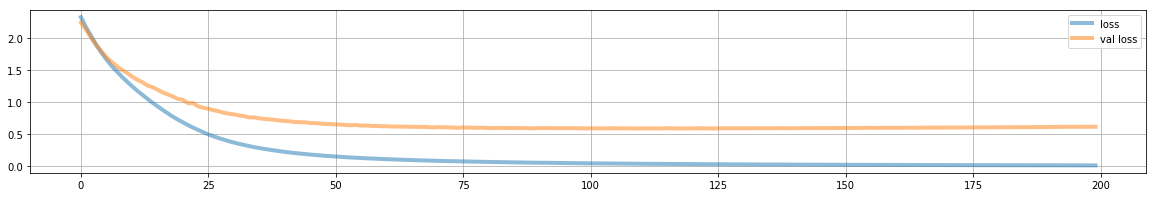

In [24]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [25]:
preds_train = model.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model.predict([X_test, X_test_extra]).argmax(axis=1)

print "accuracy train %.3f"%(np.mean(preds_train==y_train))
print "accuracy test  %.3f"%(np.mean(preds_test==y_test))

accuracy train 1.000
accuracy test  0.828
